# Predictive Analytics for Diabetes Detection
### Nick Blackford
### Introduction
This project aims to develop predictive models for detecting diabetes status using the CDC Diabetes Health Indicators dataset. By employing various machine learning techniques, we will assess the effectiveness of Logistic Regression, Decision Trees, and Random Forests in predicting whether an individual is healthy, pre-diabetic, or diabetic. This analysis will not only highlight the performance and interpretability of different models but also address critical ethical considerations and challenges associated with real-world health data.

## Data Selection and Project Proposal


#### Dataset
CDC Diabetes Health Indicators: [Dataset Link](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)

### Models
For the CDC Diabetes Health Indicators Dataset, I am planning to use three different types of models: Logistic Regression, Decision Trees, and Random Forests. Logistic Regression is a great starting point because it's simple and effective for classification tasks. It also helps us understand which features are most important. Decision Trees are next on the list because they're easy to interpret and let us visualize the decision-making process. However, since Decision Trees can sometimes overfit the data, I'll also use Random Forests. Random Forests combine multiple decision trees to improve accuracy and reduce overfitting. By comparing these models, I hope to find the best one for predicting whether someone is healthy, pre-diabetic, or has diabetes, ensuring we get both accurate and understandable results.

### Evaluation
To evaluate the results of the models on the CDC Diabetes Health Indicators Dataset, I plan to use a comprehensive approach that includes multiple performance metrics and validation techniques. Initially, I will split the dataset into training and testing sets to ensure the models are evaluated on unseen data, which helps in assessing their generalizability. Key performance metrics will include accuracy, precision, recall, and F1-score, which provide a balanced view of the models' performance, particularly in handling imbalanced classes such as pre-diabetic and diabetic cases. Additionally, I will use confusion matrices to gain detailed insights into the types of errors each model makes. For further robustness, I plan to implement cross-validation, specifically k-fold cross-validation, to ensure the models perform consistently across different subsets of the data. This will help in identifying any potential overfitting or underfitting issues. By combining these evaluation methods, I aim to select the model that not only achieves high accuracy but also maintains a good balance between precision and recall, ensuring reliable and meaningful predictions for diabetes status.

### Learnings
Through this project, I hope to gain a deeper understanding of how different machine learning models perform in predicting diabetes status using healthcare and lifestyle data. Specifically, I aim to learn which features most significantly influence the prediction of diabetes, pre-diabetes, and healthy states. By comparing Logistic Regression, Decision Trees, and Random Forests, I hope to identify the strengths and weaknesses of each model in terms of accuracy, interpretability, and robustness. Additionally, I aspire to enhance my skills in data preprocessing, feature engineering, and model evaluation. This project will also provide insights into the practical challenges of working with real-world health data, such as handling missing values and dealing with class imbalances. Ultimately, I aim to develop a reliable and interpretable model that can assist healthcare professionals in early diabetes detection and intervention, potentially improving patient outcomes.

### Ethics
When working with the CDC Diabetes Health Indicators Dataset, several risks and ethical concerns must be considered. Firstly, data privacy is a significant concern as the dataset contains sensitive health information. It is crucial to ensure that any data used is anonymized and handled in compliance with relevant data protection regulations, such as HIPAA. Secondly, there's a risk of algorithmic bias. If the dataset is not representative of the broader population, the models might produce biased results, leading to unfair treatment of certain groups. To mitigate this, I plan to carefully analyze the dataset for any biases and apply techniques to address them, such as re-sampling or adjusting model parameters.

### Contingency Plan
If the initial models—Logistic Regression, Decision Trees, and Random Forests—fail to provide satisfactory results, I will explore additional models such as Gradient Boosting Machines (e.g., XGBoost) and Support Vector Machines (SVM) to potentially yield better outcomes. These models have proven effective in various classification tasks and might address any performance issues observed with the original models. Should the dataset itself prove to be ineffective for modeling, either due to quality issues or lack of predictive power, I will pivot to a different dataset. I will seek out another dataset containing health indicators for a particular disease and perform a similar analysis. This new dataset will be chosen based on its relevance and potential to provide meaningful insights, ensuring the continuity and success of the project. By being flexible and open to alternative datasets, I aim to achieve the project’s objectives even if the original plan encounters obstacles.

## Exploratory Data Analysis (EDA)

In [18]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/Users/nickblackford/Desktop/Python/diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)

# Display the first few rows and summary information about the dataset
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

(   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
 1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
 2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
 3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
 4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
 
    HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
 0                   0.0           0.0     0.0  ...            1.0   
 1                   0.0           1.0     0.0  ...            0.0   
 2                   0.0           0.0     1.0  ...            1.0   
 3                   0.0           1.0     1.0  ...            1.0   
 4                   0.0           1.0     1.0  ...            1.0   
 
    NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
 0          0.0      5.0      18.0      15.0       1.0  0.0   9.0     

In [2]:
# Generate descriptive statistics
descriptive_stats = df.describe()
descriptive_stats

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Distribution of the Target Variable

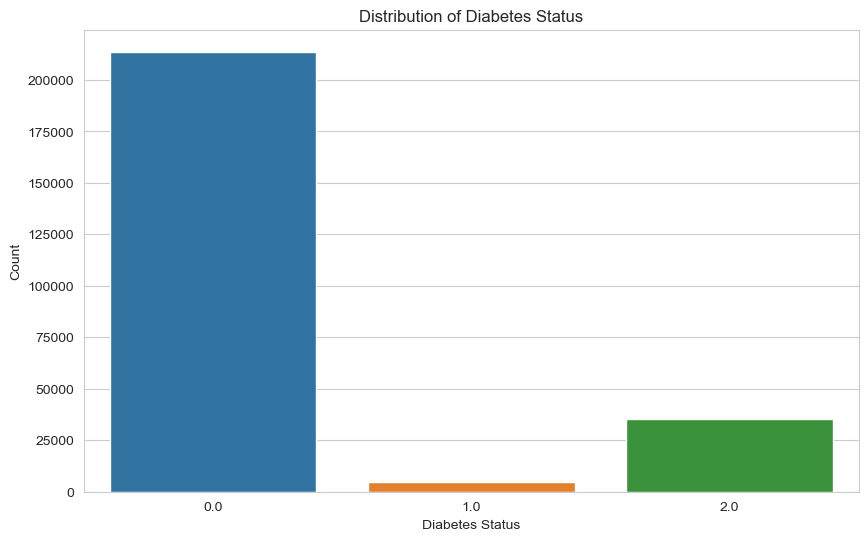

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic
sns.set_style("whitegrid")

# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes_012', data=df)
plt.title('Distribution of Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.show()
    

## Correlation Matrix

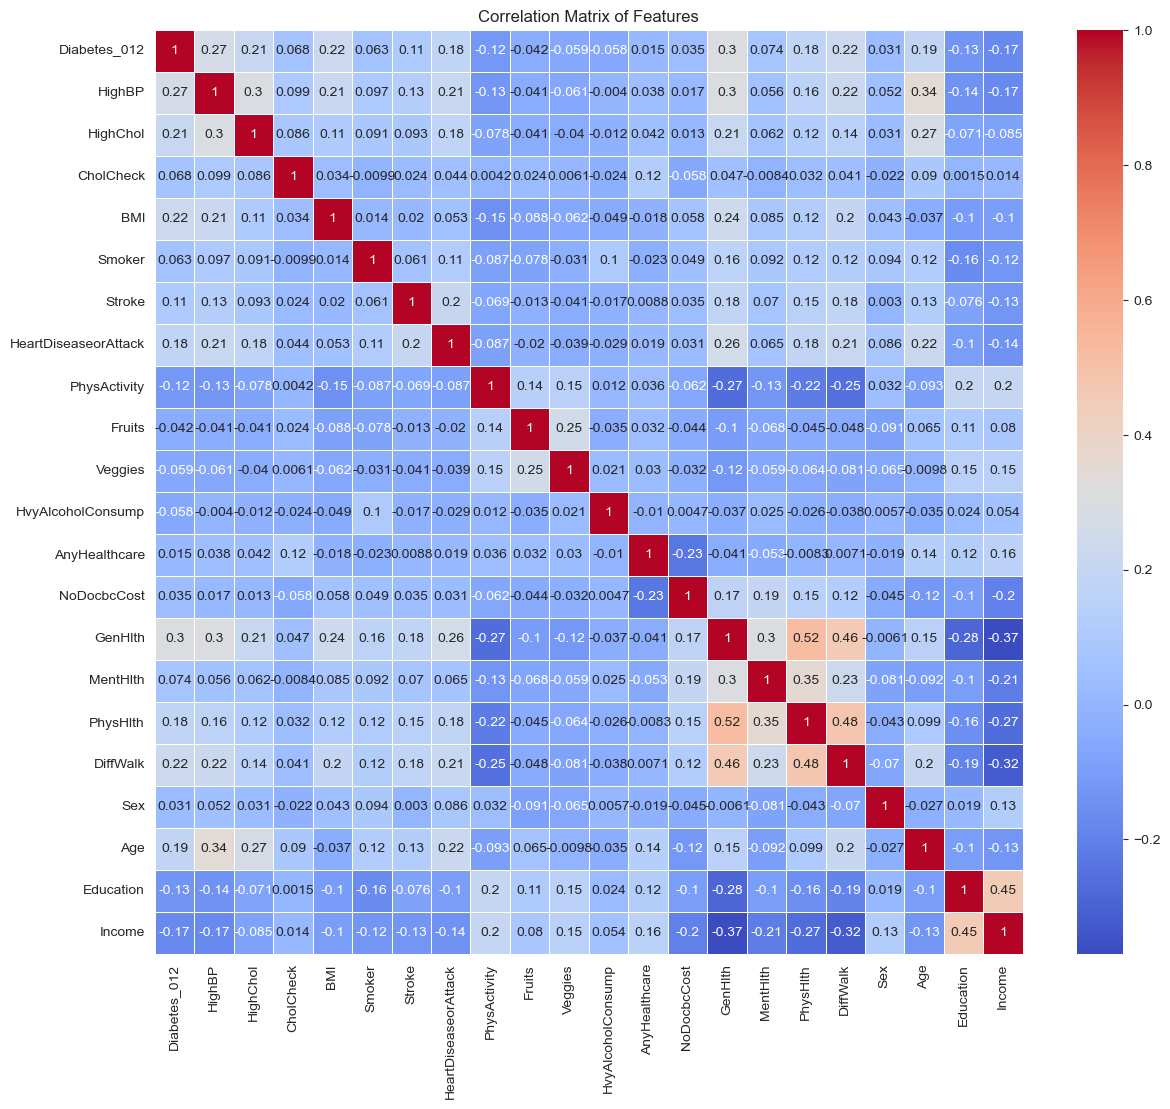

In [4]:

# Correlation matrix
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()
    

## Histograms for Key Features

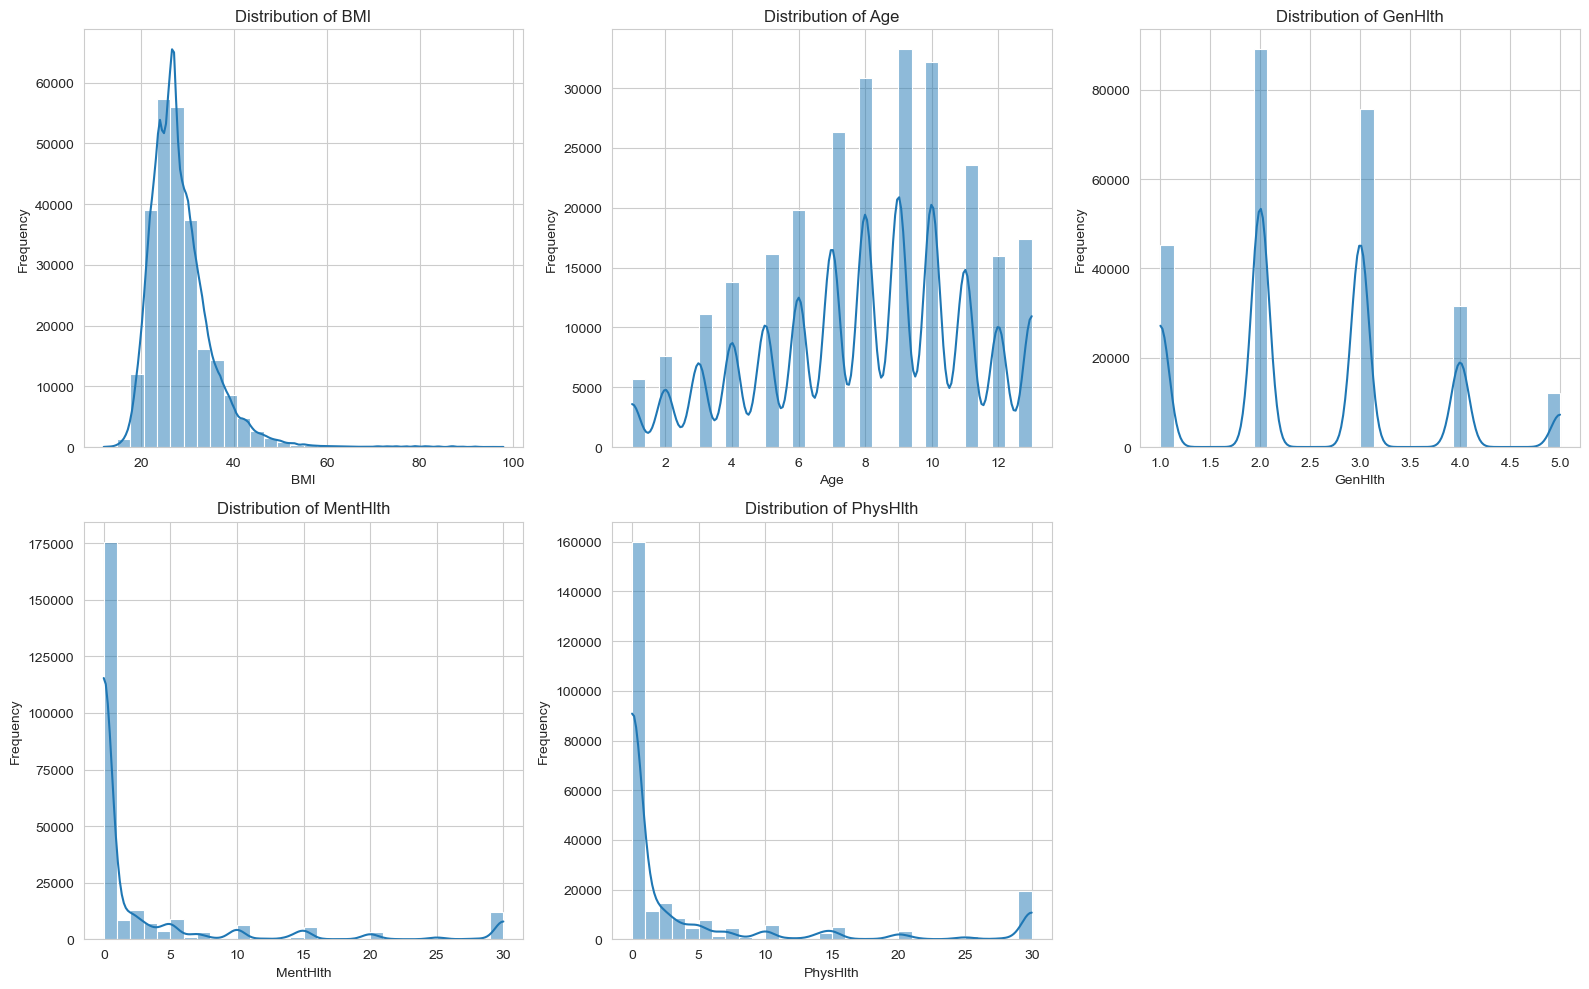

In [5]:

# Histograms for key features
key_features = ['BMI', 'Age', 'GenHlth', 'MentHlth', 'PhysHlth']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
    

## Box Plots for Features vs. Target Variable

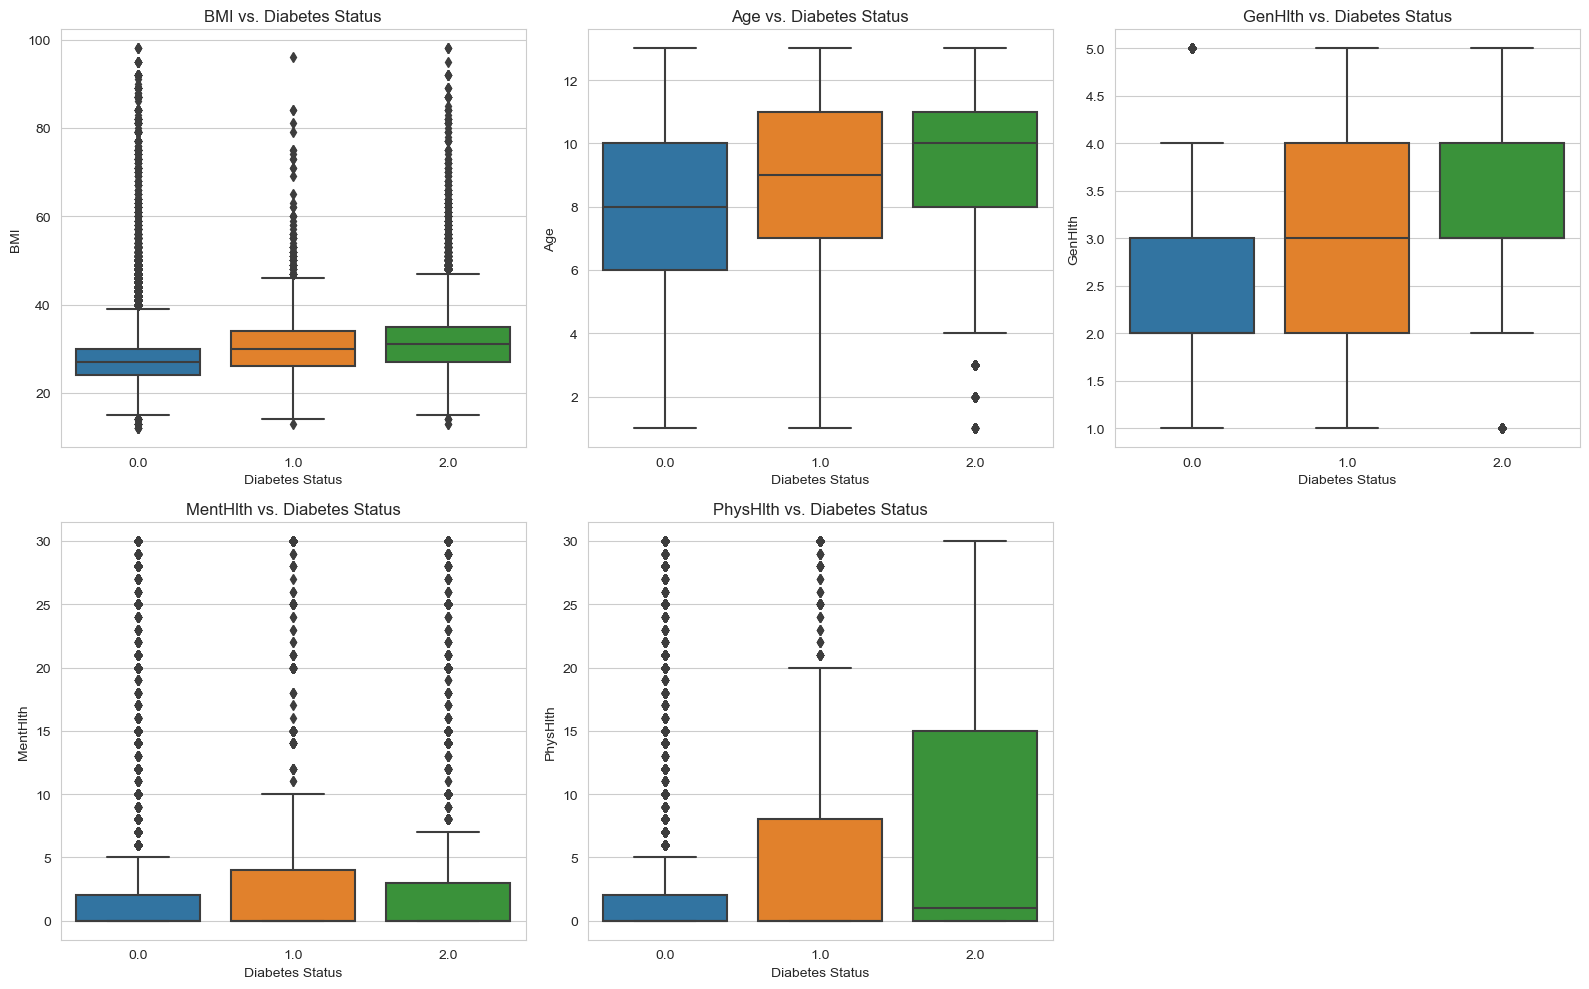

In [6]:

# Box plots for key features vs. target variable
plt.figure(figsize=(16, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Diabetes_012', y=feature, data=df)
    plt.title(f'{feature} vs. Diabetes Status')
    plt.xlabel('Diabetes Status')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()
    

## Summary of Findings and Next Steps


### Will I be able to answer the questions I want to answer with the data I have?
Yes, the dataset provides comprehensive health indicators that can help predict diabetes status. The features are relevant and cover various health aspects.

### What visualizations are especially useful for explaining my data?
- **Distribution plots** for the target variable.
- **Correlation matrix** to identify relationships between features.
- **Histograms** for understanding feature distributions.
- **Box plots** to visualize feature distributions against the target variable.

### Do I need to adjust the data and/or driving questions?
- The dataset is imbalanced, so techniques like SMOTE (Synthetic Minority Over-sampling Technique) may be needed.
- No major adjustments to the driving questions are necessary at this point.

### Do I need to adjust my model/evaluation choices?
- Given the class imbalance, evaluation metrics like the F1 score, precision, recall, and ROC-AUC should be used alongside accuracy.

### Are my original expectations still reasonable?
Yes, the initial plan to use Logistic Regression, Decision Trees, and Random Forests remains reasonable. The data exploration supports the potential effectiveness of these models.

### Next Steps
1. **Data Preprocessing**: Handle class imbalance and any necessary feature engineering.
2. **Model Training and Evaluation**: Train the planned models and evaluate them using appropriate metrics.
3. **Interpret results**
4. **Begin to formulate a conclusion / recommendations**
    

# Milestone 4

## Data Preprocessing

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Reload data to ensure purity
data = pd.read_csv(file_path)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Convert to DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

# Separate features and target variable
X = data_imputed.drop('Diabetes_012', axis=1)
y = data_imputed['Diabetes_012']

# Scale/normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


## Handle Class Imbalance 

In [15]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=8)

# Convert to DataFrame to ensure feature names are included
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)


## Feature Selection

In [19]:
# Fit Random Forest model for feature selection
rf = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)
rf.fit(X_train_df, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Select features based on importance
threshold = np.mean(feature_importances)
selected_features = X_train_df.columns[feature_importances > threshold]

# Transform data to keep only selected features
X_train_selected = X_train_df[selected_features]
X_test_selected = X_test_df[selected_features]

selected_features.tolist()

['HighBP', 'HighChol', 'BMI', 'GenHlth', 'PhysHlth', 'Age', 'Income']

## Train Models

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_train_selected, y_train)
y_pred_log_reg = log_reg.predict(X_test_selected)

# Performance metrics
log_reg_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_log_reg),
    'Precision': precision_score(y_test, y_pred_log_reg, average='weighted'),
    'Recall': recall_score(y_test, y_pred_log_reg, average='weighted'),
    'F1-score': f1_score(y_test, y_pred_log_reg, average='weighted'),
    'ROC-AUC': roc_auc_score(y_test, log_reg.predict_proba(X_test_selected), multi_class='ovr')
}
log_reg_metrics


{'Accuracy': 0.521298997051988,
 'Precision': 0.5098410028540931,
 'Recall': 0.521298997051988,
 'F1-score': 0.5084768999283273,
 'ROC-AUC': 0.7112844629087087}

### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_selected, y_train)
y_pred_tree = tree_clf.predict(X_test_selected)

# Performance metrics
tree_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_tree),
    'Precision': precision_score(y_test, y_pred_tree, average='weighted'),
    'Recall': recall_score(y_test, y_pred_tree, average='weighted'),
    'F1-score': f1_score(y_test, y_pred_tree, average='weighted'),
    'ROC-AUC': roc_auc_score(y_test, tree_clf.predict_proba(X_test_selected), multi_class='ovr')
}
tree_metrics


{'Accuracy': 0.7797933791912984,
 'Precision': 0.7755880778572916,
 'Recall': 0.7797933791912984,
 'F1-score': 0.7765933506840091,
 'ROC-AUC': 0.8375762993944565}

### Random Forest

In [22]:
# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_selected, y_train)
y_pred_rf = rf_clf.predict(X_test_selected)

# Performance metrics
rf_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf, average='weighted'),
    'Recall': recall_score(y_test, y_pred_rf, average='weighted'),
    'F1-score': f1_score(y_test, y_pred_rf, average='weighted'),
    'ROC-AUC': roc_auc_score(y_test, rf_clf.predict_proba(X_test_selected), multi_class='ovr')
}
rf_metrics


{'Accuracy': 0.8283081946415851,
 'Precision': 0.826080489619473,
 'Recall': 0.8283081946415851,
 'F1-score': 0.825265634853426,
 'ROC-AUC': 0.9390165560290926}

## Model Performance

In [24]:
# Compile metrics into a DataFrame
metrics_df = pd.DataFrame([log_reg_metrics, tree_metrics, rf_metrics], 
                          index=['Logistic Regression', 'Decision Tree', 'Random Forest'])

# Display the DataFrame
print(metrics_df)

                     Accuracy  Precision    Recall  F1-score   ROC-AUC
Logistic Regression  0.521299   0.509841  0.521299  0.508477  0.711284
Decision Tree        0.779793   0.775588  0.779793  0.776593  0.837576
Random Forest        0.828308   0.826080  0.828308  0.825266  0.939017


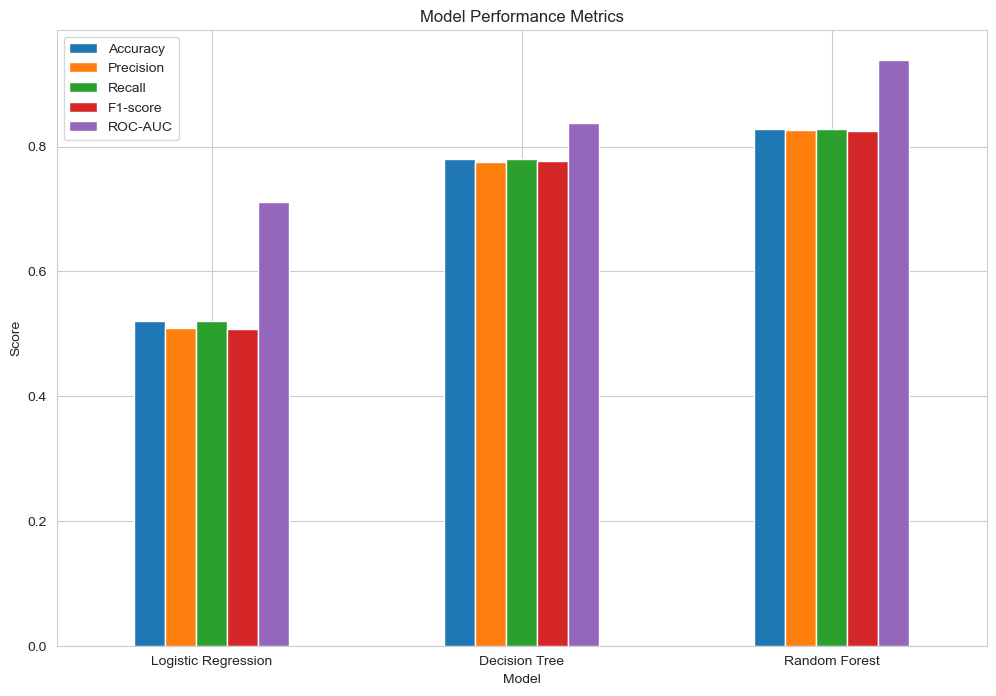

In [28]:
# Plot the performance metrics
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

## Interpretation of Model Performance 

**Accuracy**

The random forest has the highest accuracy (0.82), meaning it accurately classified the samples at the highest rate out of all 3 models. The next most accurate model was the decision tree, with a slightly lower accuracy (0.78). The logistic regression came in significantly lower than both (0.52). 

**Precision, Recall, and F1**

The random forest also had the highest precision at 0.83, meaning it had the fewest false positive among all the models. This is a significant performance metric for this particular use case as diagnosing / predicting diabetes for nondiabetic individuals could have serious consequences. Similarly, the random forest also performed best in recall, indicating it misses the fewest actual positive cases. As a result, the random forest also had the best F1 score, since it had the best balance between precision and recall. 

**ROC-AUC**

The random forest had the best ability to distinguish between classes (0.94). Like the rest of the performance metrics, the decision tree model performed second, and the logistic regression performed the worst out of the 3 models. 

## Recommendations

1. **Model Selection:**
   - **Random Forest:** 
     - **Recommendation:** This model has the highest scores across all metrics, making it the best choice for this task. Its high precision and recall indicate it handles both false positives and false negatives well. With both high precision and recall, this model is most suitable for predicting diabetes. However, with an accuracy of only 83%, this should only be used as a tool to test and not diagnose patients. An accuracy of near 100% would be needed to use this model as a diagnostic tool. 


   - **Decision Tree:** 
     - **Recommendation:** This model performs well, second to Random Forest, with strengths in interpretability and capturing non-linear relationships. With further parameter tuning, the decision tree could become a viable option, but the random forest has additional capabilities that may make this model irrelevant. 

   - **Logistic Regression:** 
     - **Recommendation:** This model performs significantly worse than the other 2, indicating it is probably not suitable for the use case of predicting diabetes without severe tuning of parameters and further testing. 
 

2. **Further Improvements:**
   - **Hyperparameter Tuning:** Continue with hyperparameter tuning using more advanced techniques like Random Search or Bayesian Optimization to further optimize model performance.
   - **Feature Engineering:** Explore additional feature engineering techniques to create new features or interactions that may improve model performance.
   - **Handling Imbalanced Data:** If the classes are imbalanced, consider techniques such as cost-sensitive learning or further tweaking SMOTE parameters.
   - **More Data and Better Data Collection:** Although 200,000+ observations may seem like a lot, it is rather insignificant when considering the total population, especially given the low rate of type 1 diabetics actually recorded in this dataset. Also, ensuring that the sample data is actually representative of the population where these models will be used is pivotal in ensuring accurate models. 